In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 코랩 사용시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [ ]:
path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [ ]:
os.getcwd()

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [3]:
apart_train = pd.read_csv('Apartment_train.csv')
apart_test = pd.read_csv('Apartment_test.csv')

2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [20]:
월세_train = apart_train[apart_train['전월세구분'] == '월세']
전세_train = apart_train[apart_train['전월세구분'] == '전세']

월세_test = apart_test[apart_test['전월세구분'] == '월세']
전세_test = apart_test[apart_test['전월세구분'] == '전세']

3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [45]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()

In [46]:
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font

path = 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=12).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [47]:
plt.rcParams['font.family']

['NanumGothic']

<AxesSubplot:title={'center':'전세_train : 보증금 vs'}>

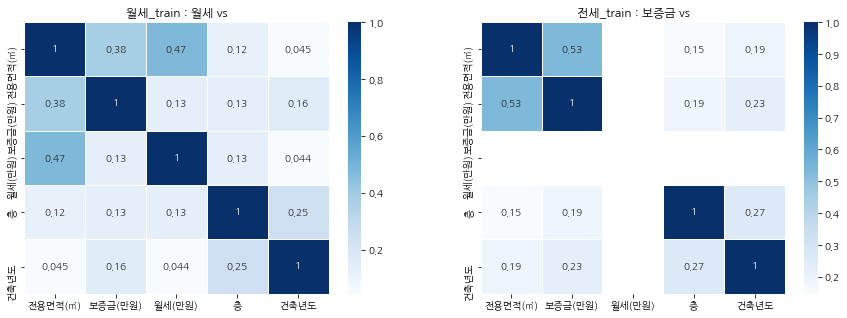

In [49]:
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('월세_train : 월세 vs')
sns.heatmap(월세_train.corr(), annot=True, cmap='Blues', linewidth=1)

plt.subplot(1, 2, 2)
plt.title('전세_train : 보증금 vs')
sns.heatmap(전세_train.corr(), annot=True, cmap='Blues', linewidth=1)

- 상관계수 보았을 때
    - 월세_train : 월세와 전용면적 관계 가장 큼
    - 전세_train : 보증금과 전용면적 관계 가장 큼
    
- 전용면적이 영향 가장 미치는 feature로 보임

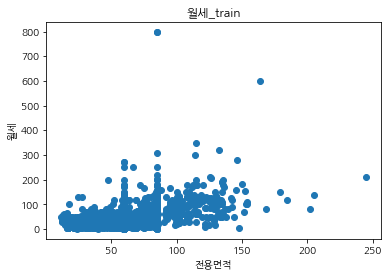

In [50]:
plt.scatter(월세_train.iloc[:,3], 월세_train.iloc[:,5])
plt.xlabel('전용면적')
plt.ylabel('월세')
plt.title('월세_train')
plt.show()

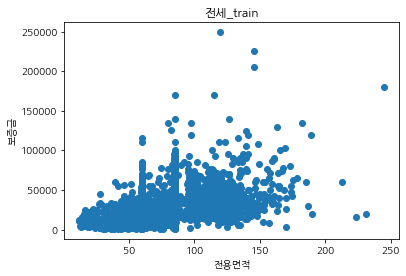

In [51]:
plt.scatter(전세_train.iloc[:,3], 전세_train.iloc[:,4])
plt.xlabel('전용면적')
plt.ylabel('보증금')
plt.title('전세_train')
plt.show()

- 산점도 보았을 때, 둘 모두 전용면적과 관계있는 것으로 보임

4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [52]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [62]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = np.array(월세_train.iloc[:,3])
y1_train = np.array(월세_train.iloc[:,5])

# 2차원 변환!
X_train = X_train[:, np.newaxis]
X_train.shape

(4932, 1)

In [64]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.96192644],
       [-1.55772264],
       [-0.06186906],
       ...,
       [-0.06218054],
       [-0.31314327],
       [ 0.86139792]])

In [65]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y1_train)

LinearRegression()

In [68]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.family']

['sans-serif']

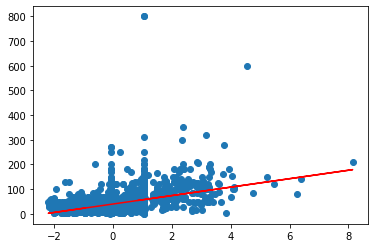

In [69]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
          lin_reg_1.predict(X_train), 
          c='r');

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [70]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = np.array(월세_test.iloc[:,3])
y1_test = np.array(월세_test.iloc[:,5])

# 2차원 변환!
X_test = X_test[:, np.newaxis]
X_test.shape

(1022, 1)

In [71]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?

# 주의할점은 fit을 다시하면 안되고 위에서 만든 scaler 그대로 써야함!
# fit_transform 아니라 transform만

X_test = scaler.transform(X_test)
X_test

array([[-0.69136725],
       [-0.66066436],
       [-0.65220994],
       ...,
       [ 0.82019375],
       [-0.50848483],
       [ 0.47044782]])

In [72]:
# y1_hat에 predict값 할당
y1_hat = lin_reg_1.predict(X_test)
y1_hat

array([28.25249644, 28.77680187, 28.92117582, ..., 54.06504043,
       31.37553311, 48.09251774])

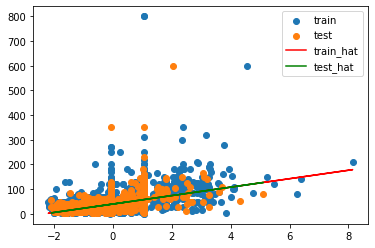

In [73]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
          lin_reg_1.predict(X_train), 
          c='r', label='train_hat')
plt.plot(X_test[:, 0], 
          y1_hat, 
          c='g', label='test_hat')

plt.legend();

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [74]:
# 관련 모듈 import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [76]:
# 파이프라인 생성
p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('rdg_reg_1', Ridge(alpha=0.5))
])

In [75]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = np.array(전세_train.iloc[:,3])
y2_train = np.array(전세_train.iloc[:,4])

# 2차원 변환!
X_train = X_train[:, np.newaxis]
X_train.shape

(9068, 1)

In [77]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('rdg_reg_1', Ridge(alpha=0.5))])

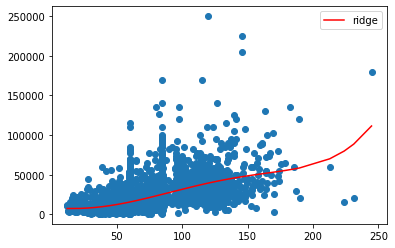

In [78]:
# # 시각화. 체크용입니다.
# # degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
          np.sort(p1.predict(X_train)), 
          c='r', label='ridge')
plt.legend();

수고하셨습니다.